In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

leelyakhodier_pr_cproject_path = kagglehub.dataset_download('leelyakhodier/pr-cproject')

print('Data source import complete.')


# **Telangana Crop Health Prediction**
---------

### Students work:
- **Besan Alattal 0214632**
- **Leelya Khodier 0216229**

### Pattern Recognition and Information Analysis Course

# **Load Data**

In [ ]:
import pandas as pd
train_path = "../input/pr-cproject/Train.csv"
df = pd.read_csv(train_path)
df.columns

Index(['FarmID', 'category', 'Crop', 'State', 'District', 'Sub-District',
       'SDate', 'HDate', 'CropCoveredArea', 'CHeight', 'CNext', 'CLast',
       'CTransp', 'IrriType', 'IrriSource', 'IrriCount', 'WaterCov',
       'ExpYield', 'Season', 'geometry'],
      dtype='object')

# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FarmID           8775 non-null   int64 
 1   category         8775 non-null   object
 2   Crop             8775 non-null   object
 3   State            8775 non-null   object
 4   District         8775 non-null   object
 5   Sub-District     8775 non-null   object
 6   SDate            8775 non-null   object
 7   HDate            8775 non-null   object
 8   CropCoveredArea  8775 non-null   int64 
 9   CHeight          8775 non-null   int64 
 10  CNext            8775 non-null   object
 11  CLast            8775 non-null   object
 12  CTransp          8775 non-null   object
 13  IrriType         8775 non-null   object
 14  IrriSource       8775 non-null   object
 15  IrriCount        8775 non-null   int64 
 16  WaterCov         8775 non-null   int64 
 17  ExpYield         8775 non-null   

In [ ]:
# Check for Duplicate rows
df.duplicated().sum()

0

In [ ]:
# Descriptive statistics
# most of the features type is object
df.describe()

,FarmID,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield
count,8.775000e+03,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000
mean,1.252339e+06,76.553504,87.707806,3.550541,57.150199,15.541197
std,2.447332e+05,15.002601,49.307300,1.391602,22.330291,5.933997
min,2.780000e+02,40.000000,20.000000,1.000000,20.000000,5.000000
25%,1.314020e+06,65.000000,57.000000,2.000000,42.000000,11.000000
50%,1.324434e+06,78.000000,76.000000,4.000000,51.000000,15.000000
75%,1.329228e+06,89.000000,100.000000,5.000000,82.000000,20.000000
max,1.332157e+06,100.000000,250.000000,6.000000,100.000000,30.000000


In [ ]:
# features with 100% uniquness in our case is considered irrelevant
for i in df.columns:
  print(i, df[i].nunique())

FarmID 8775
category 4
Crop 7
State 1
District 14
Sub-District 116
SDate 545
HDate 602
CropCoveredArea 61
CHeight 231
CNext 10
CLast 10
CTransp 4
IrriType 4
IrriSource 5
IrriCount 6
WaterCov 62
ExpYield 26
Season 2
geometry 8775


In [ ]:
# Printing unique values for each feature along with feature name and description

# Multi-class target variable
print("category feature: ", df["category"].unique())  # Multi-class problem (Healthy, Diseased, Pests, Stressed)
print()

# Crop type
print("Crop feature: ", df["Crop"].unique())  # Crop type (e.g., Paddy, Cotton, Maize, etc.)
print()

# Area covered by the crop
print("CropCoveredArea feature: ", df["CropCoveredArea"].unique())  # Area of land covered by the crop
print()

# Next crop to be planted
print("CNext feature: ", df["CNext"].unique())  # The plant that will be planted after the current one
print()

# Previous crop
print("CLast feature: ", df["CLast"].unique())  # The previous crop, which might be more relevant to the crop's current condition
print()

# Transplantation method
print("CTransp feature: ", df["CTransp"].unique())  # Type of transplantation method used (e.g., Transplanting, Broadcasting, etc.)
print()

# Type of irrigation used
print("IrriType feature: ", df["IrriType"].unique())  # Type of irrigation used (e.g., Surface, Drip, etc.)
print()

# Source of irrigation
print("IrriSource feature: ", df["IrriSource"].unique())  # Source of irrigation (e.g., Groundwater, Canal, etc.)
print()

# Number of irrigation events
print("IrriCount feature: ", df["IrriCount"].unique())  # Number of irrigation events for the crop


category feature:  ['Healthy' 'Diseased' 'Pests' 'Stressed']

Crop feature:  ['Paddy' 'Cotton' 'Maize' 'Bengal Gram' 'Groundnut' 'Chillies' 'Red Gram']

CropCoveredArea feature:  [ 97  82  92  91  94  84  86  90  89  93  96  80  95  85  83  81  99  88
  87 100  98  66  65  62  72  64  77  67  76  79  60  73  69  71  75  78
  74  70  68  61  63  54  51  59  55  57  58  53  56  50  52  46  49  45
  44  41  48  43  42  40  47]

CNext feature:  ['Pea' 'Lentil' 'Sorghum' 'Maize' 'Wheat' 'Soybean' 'Mustard' 'Rice'
 'Tomato' 'Onion']

CLast feature:  ['Lentil' 'Pea' 'Maize' 'Sorghum' 'Soybean' 'Wheat' 'Mustard' 'Rice'
 'Onion' 'Tomato']

CTransp feature:  ['Transplanting' 'Broadcasting' 'Drilling' 'Seed Drilling']

IrriType feature:  ['Flood' 'Sprinkler' 'Drip' 'Surface']

IrriSource feature:  ['Groundwater' 'Canal' 'Rainfed' 'Well' 'Tubewell']

IrriCount feature:  [4 5 3 6 2 1]


---
Visualize the distribution of the nummerical data.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

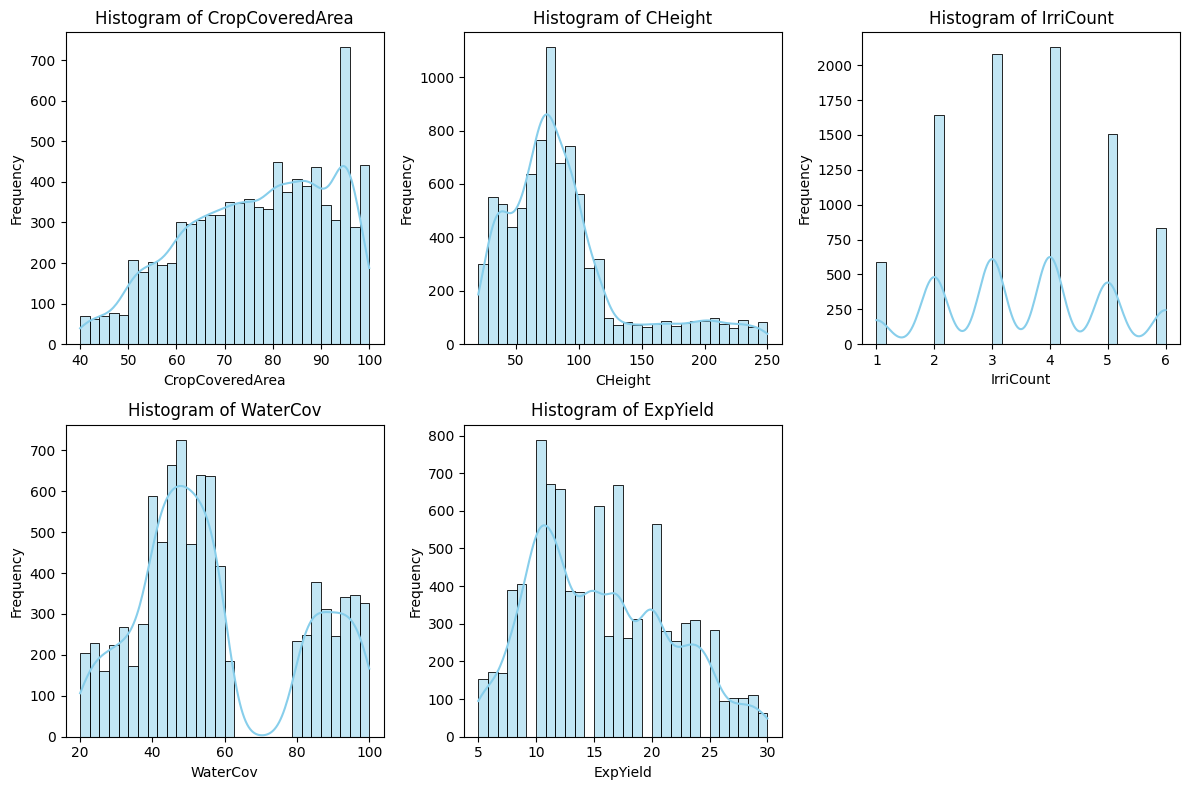

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of numerical columns
numerical_columns = ['CropCoveredArea', 'CHeight', 'IrriCount', 'WaterCov', 'ExpYield']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Loop through each numerical column to create a histogram
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns for the subplots
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


---
Bar Plot for the Categorical features.

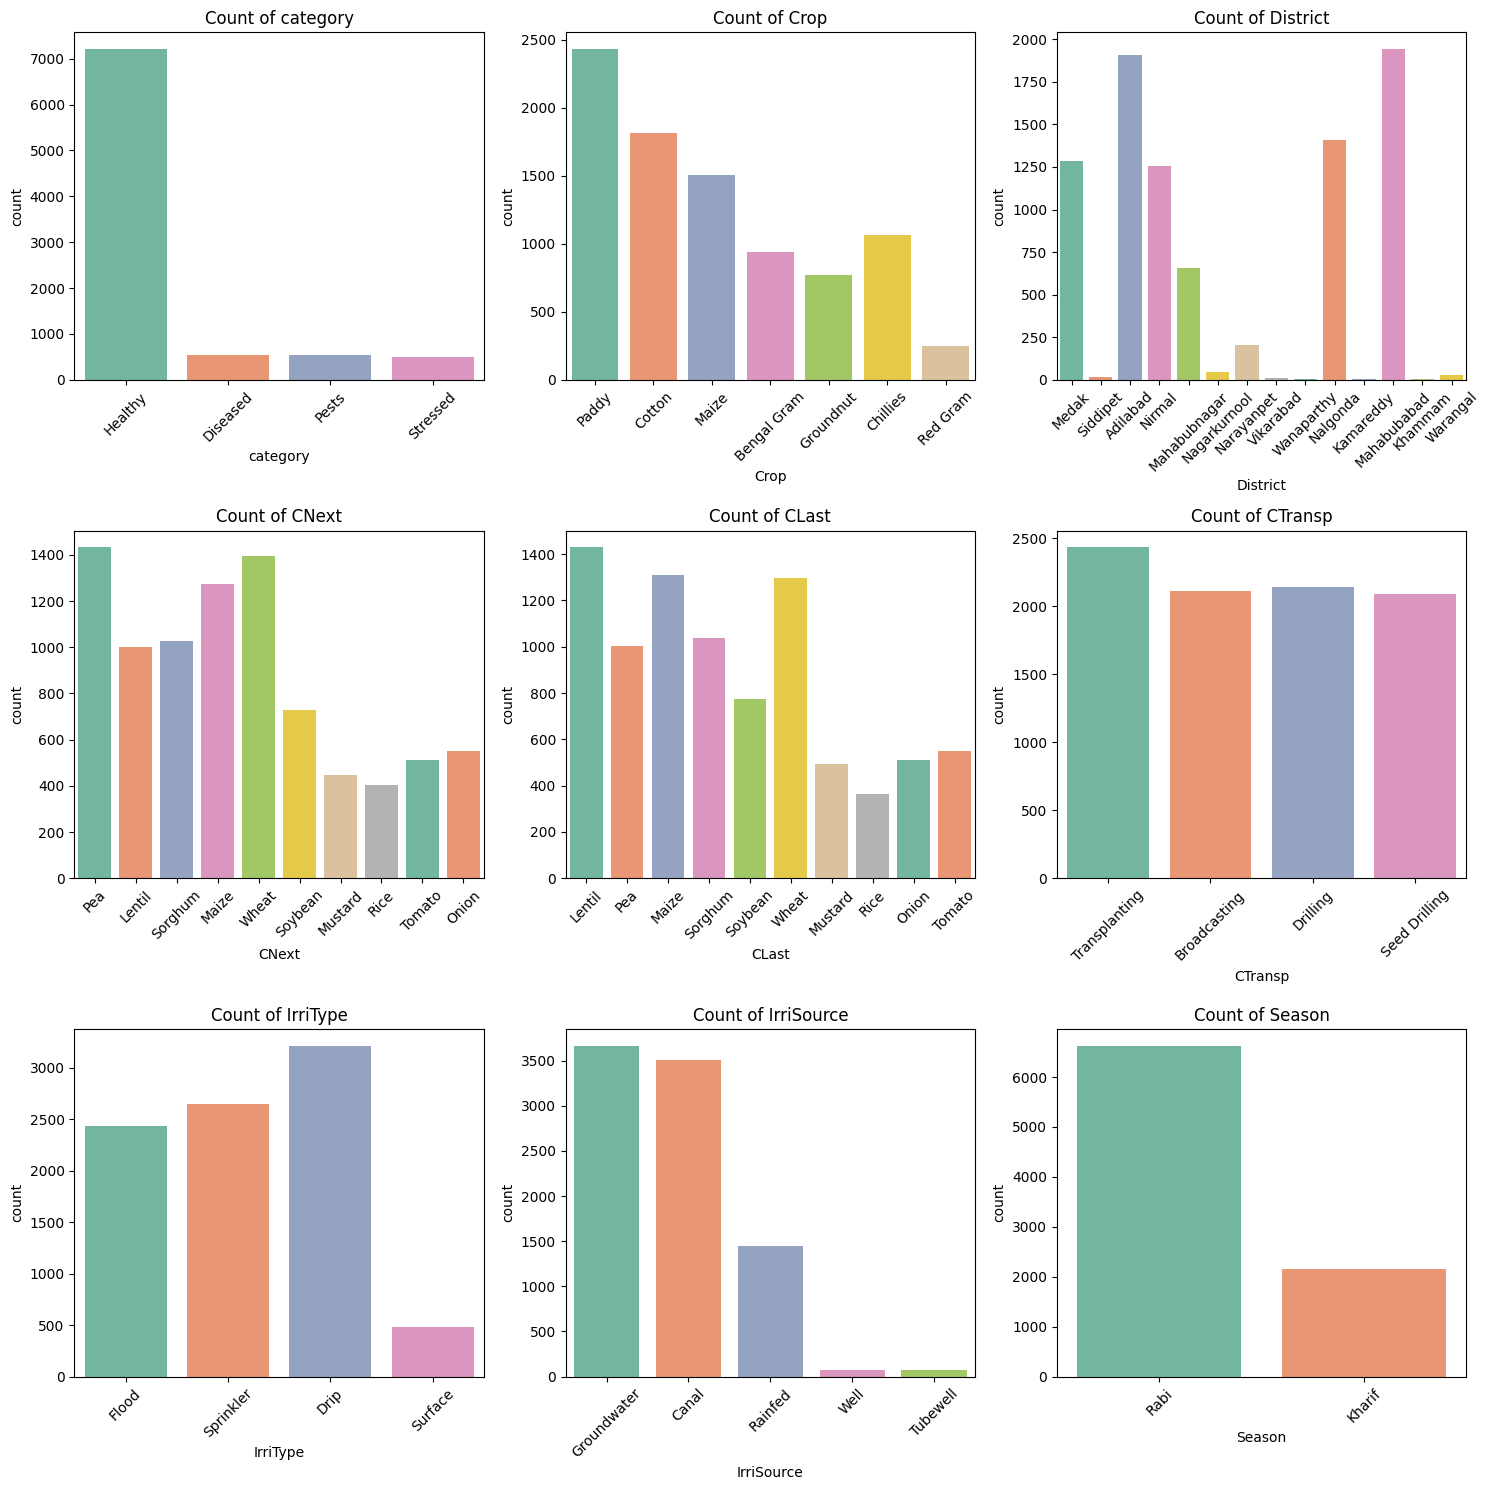

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns (excluding geometry, SDate, HDate, and Sub-District)
categorical_columns = [
    'category', 'Crop', 'District',
    'CNext', 'CLast', 'CTransp', 'IrriType', 'IrriSource', 'Season'
]

# Set up the plotting environment
plt.figure(figsize=(15, 15))

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for the subplots
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()

plt.show()

# **Feature Engineering and Feature Selection**

In [ ]:
# note is that our method is to create mulitple data frames and experiment

In [ ]:
# drop FarmID, State (feature selection)
df.drop(['FarmID', 'State'], axis=1, inplace = True)

In [ ]:
# since the datetype is hard to handel in the models and the time to harvest hold more potential information
df['SDate'] = pd.to_datetime(df['SDate'])
df['HDate'] = pd.to_datetime(df['HDate'])
df['time_to_harvest'] = (df['HDate'] - df['SDate']).dt.days
df.drop(['HDate', 'SDate'], axis=1, inplace = True)

<ipython-input-12-09335e2e2a65>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['SDate'] = pd.to_datetime(df['SDate'])
<ipython-input-12-09335e2e2a65>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['HDate'] = pd.to_datetime(df['HDate'])


In [ ]:
# Create a new feature by combining 'District' and 'Sub-District'
df['District_SubDistrict'] = df['District'] + "_" + df['Sub-District']

In [ ]:
# feature engineering
import geopandas as gpd
from shapely import wkt

# Sample data with POLYGON geometry


# Convert the 'geometry' column from WKT string to a Shapely object
df['geometry'] = df['geometry'].apply(wkt.loads)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Extract the area, perimeter, and centroid of the polygon
gdf['area'] = gdf.geometry.area
gdf['perimeter'] = gdf.geometry.length
gdf['centroid_x'] = gdf.geometry.centroid.x
gdf['centroid_y'] = gdf.geometry.centroid.y

# Display the extracted features
print(gdf[['area', 'perimeter', 'centroid_x', 'centroid_y']])

              area  perimeter  centroid_x  centroid_y
0     3.982611e-08   0.000849   78.181592   17.978863
1     5.989901e-08   0.001016   78.175606   17.980966
2     3.867260e-08   0.000798   78.169207   17.976084
3     4.745308e-08   0.000913   78.169059   17.974588
4     2.324137e-08   0.000609   78.172695   17.969159
...            ...        ...         ...         ...
8770  6.327067e-07   0.003409   78.792458   19.734771
8771  4.594201e-07   0.002926   78.798041   19.753591
8772  3.275306e-07   0.002660   78.808465   19.754302
8773  2.996401e-07   0.002353   78.809808   19.753226
8774  9.131537e-08   0.001370   80.114996   17.371838

[8775 rows x 4 columns]


In [ ]:
df.columns

Index(['category', 'Crop', 'District', 'Sub-District', 'CropCoveredArea',
       'CHeight', 'CNext', 'CLast', 'CTransp', 'IrriType', 'IrriSource',
       'IrriCount', 'WaterCov', 'ExpYield', 'Season', 'geometry',
       'time_to_harvest', 'District_SubDistrict'],
      dtype='object')

# **Feature Encoding**

In [ ]:
# to handel the imbalance data we will use the oversampling methon noting that our data is splited to train test and validate

In [ ]:
# category
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'category' column
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [ ]:
df.columns

Index(['category', 'Crop', 'District', 'Sub-District', 'CropCoveredArea',
       'CHeight', 'CNext', 'CLast', 'CTransp', 'IrriType', 'IrriSource',
       'IrriCount', 'WaterCov', 'ExpYield', 'Season', 'geometry',
       'time_to_harvest', 'District_SubDistrict', 'category_encoded'],
      dtype='object')

In [ ]:
'''# Calculate the global mean for the test dataset predictiion
# Label Encoding
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_train_res.shape[0]}")

# Calculate the global mean
global_mean = y_train_res.mean()
print(f"Global Mean of 'category_encoded' in Resampled Training Data: {global_mean:.4f}")'''

#THE OUTPUT:
#Original training set size: 6142
#Resampled training set size: 20196
#Global Mean of 'category_encoded' in Resampled Training Data: 1.5000

'# Calculate the global mean for the test dataset predictiion \n# Label Encoding\nlabel_encoder = LabelEncoder()\ndf[\'category_encoded\'] = label_encoder.fit_transform(df[\'category\'])\n\n# Apply SMOTE to the training data \nX_train_res, y_train_res = smote.fit_resample(X_train, y_train)\nprint(f"Original training set size: {X_train.shape[0]}")\nprint(f"Resampled training set size: {X_train_res.shape[0]}")\n\n# Calculate the global mean \nglobal_mean = y_train_res.mean()\nprint(f"Global Mean of \'category_encoded\' in Resampled Training Data: {global_mean:.4f}")'

In [ ]:
encoded_features = pd.get_dummies(df['Crop'], prefix='Crop_Encoded')
df = pd.concat([df, encoded_features], axis=1)

In [ ]:
df.columns

Index(['category', 'Crop', 'District', 'Sub-District', 'CropCoveredArea',
       'CHeight', 'CNext', 'CLast', 'CTransp', 'IrriType', 'IrriSource',
       'IrriCount', 'WaterCov', 'ExpYield', 'Season', 'geometry',
       'time_to_harvest', 'District_SubDistrict', 'category_encoded',
       'Crop_Encoded_Bengal Gram', 'Crop_Encoded_Chillies',
       'Crop_Encoded_Cotton', 'Crop_Encoded_Groundnut', 'Crop_Encoded_Maize',
       'Crop_Encoded_Paddy', 'Crop_Encoded_Red Gram'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a new column for target-encoded 'District_SubDistrict' and initialize with NaN
df['district_subdistrict_encoded'] = np.nan

# Calculate the global mean of the target
global_mean = df['category_encoded'].mean()

# Perform target encoding with cross-validation
for train_idx, val_idx in kf.split(df):
    # Calculate the mean target for each 'District_SubDistrict' in the training fold
    district_subdistrict_means = (
        df.iloc[train_idx]
        .groupby('District_SubDistrict')['category_encoded']
        .mean()
    )

    # Map the means to the validation fold
    df.loc[val_idx, 'district_subdistrict_encoded'] = (
        df.iloc[val_idx]['District_SubDistrict'].map(district_subdistrict_means)
    )

# Fill missing values with the global mean
df['district_subdistrict_encoded'].fillna(global_mean, inplace=True)

# Result
print(df[['District_SubDistrict', 'district_subdistrict_encoded']].head())


  District_SubDistrict  district_subdistrict_encoded
0      Medak_Kulcharam                           1.0
1      Medak_Kulcharam                           1.0
2      Medak_Kulcharam                           1.0
3      Medak_Kulcharam                           1.0
4      Medak_Kulcharam                           1.0


In [ ]:
df.columns

Index(['category', 'Crop', 'District', 'Sub-District', 'CropCoveredArea',
       'CHeight', 'CNext', 'CLast', 'CTransp', 'IrriType', 'IrriSource',
       'IrriCount', 'WaterCov', 'ExpYield', 'Season', 'geometry',
       'time_to_harvest', 'District_SubDistrict', 'category_encoded',
       'Crop_Encoded_Bengal Gram', 'Crop_Encoded_Chillies',
       'Crop_Encoded_Cotton', 'Crop_Encoded_Groundnut', 'Crop_Encoded_Maize',
       'Crop_Encoded_Paddy', 'Crop_Encoded_Red Gram',
       'district_subdistrict_encoded'],
      dtype='object')

In [ ]:
# One-Hot Encoding for 'Season'
season_encoded = pd.get_dummies(df['Season'], prefix='Season')
df = pd.concat([df, season_encoded], axis=1)

# One-Hot Encoding for 'CNext', 'CLast', 'IrriType', and 'IrriSource'
cnext_encoded = pd.get_dummies(df['CNext'], prefix='CNext')
clast_encoded = pd.get_dummies(df['CLast'], prefix='CLast')
irri_type_encoded = pd.get_dummies(df['IrriType'], prefix='IrriType')
irri_source_encoded = pd.get_dummies(df['IrriSource'], prefix='IrriSource')

# Concatenate the encoded features back to the original DataFrame
df = pd.concat([df, cnext_encoded, clast_encoded, irri_type_encoded, irri_source_encoded], axis=1)

# **Creating Different DataFrames**

---
First DataFrame

In [ ]:
# here is the dataframe with only encoded features used mainly to apply upsampling
# create the new data frame
selected_columns = ['CropCoveredArea', 'CHeight', 'IrriCount', 'WaterCov',
 'ExpYield', 'time_to_harvest', 'category_encoded', 'district_subdistrict_encoded',
 'CNext_Maize', 'CNext_Mustard', 'CNext_Onion', 'CNext_Pea', 'CNext_Rice',
 'CNext_Sorghum', 'CNext_Soybean', 'CNext_Tomato', 'CNext_Wheat', 'CLast_Maize',
 'CLast_Mustard', 'CLast_Onion', 'CLast_Pea', 'CLast_Rice', 'CLast_Sorghum',
 'CLast_Soybean', 'CLast_Tomato', 'CLast_Wheat', 'IrriType_Flood', 'IrriType_Sprinkler',
 'IrriType_Surface', 'IrriSource_Groundwater', 'IrriSource_Rainfed', 'IrriSource_Tubewell',
 'IrriSource_Well', 'Season_Rabi']

modified_df = df[selected_columns]

modified_df.head()

,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,time_to_harvest,category_encoded,district_subdistrict_encoded,CNext_Maize,CNext_Mustard,...,CLast_Tomato,CLast_Wheat,IrriType_Flood,IrriType_Sprinkler,IrriType_Surface,IrriSource_Groundwater,IrriSource_Rainfed,IrriSource_Tubewell,IrriSource_Well,Season_Rabi
0,97,54,4,87,17,141,1,1.0,False,False,...,False,False,True,False,False,True,False,False,False,True
1,82,58,5,94,15,165,1,1.0,False,False,...,False,False,True,False,False,False,False,False,False,True
2,92,91,3,99,20,131,1,1.0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,91,52,5,92,16,632,0,1.0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,94,55,5,97,20,159,0,1.0,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
df.columns

Index(['category', 'Crop', 'District', 'Sub-District', 'CropCoveredArea',
       'CHeight', 'CNext', 'CLast', 'CTransp', 'IrriType', 'IrriSource',
       'IrriCount', 'WaterCov', 'ExpYield', 'Season', 'geometry',
       'time_to_harvest', 'District_SubDistrict', 'category_encoded',
       'Crop_Encoded_Bengal Gram', 'Crop_Encoded_Chillies',
       'Crop_Encoded_Cotton', 'Crop_Encoded_Groundnut', 'Crop_Encoded_Maize',
       'Crop_Encoded_Paddy', 'Crop_Encoded_Red Gram',
       'district_subdistrict_encoded', 'Season_Kharif', 'Season_Rabi',
       'CNext_Lentil', 'CNext_Maize', 'CNext_Mustard', 'CNext_Onion',
       'CNext_Pea', 'CNext_Rice', 'CNext_Sorghum', 'CNext_Soybean',
       'CNext_Tomato', 'CNext_Wheat', 'CLast_Lentil', 'CLast_Maize',
       'CLast_Mustard', 'CLast_Onion', 'CLast_Pea', 'CLast_Rice',
       'CLast_Sorghum', 'CLast_Soybean', 'CLast_Tomato', 'CLast_Wheat',
       'IrriType_Drip', 'IrriType_Flood', 'IrriType_Sprinkler',
       'IrriType_Surface', 'IrriSource_Canal'

---
Second DataFrame

In [ ]:
# without geometry
original_df = df[[
    "category", "Crop", "District", "Sub-District",
    "CropCoveredArea", "CHeight", "CNext", "CLast", "CTransp", "IrriType",
    "IrriSource", "IrriCount", "WaterCov", "ExpYield", "Season", "time_to_harvest"

]]

# **Oversampling using SMOTE on the modified_df**
only excepts nummerical data.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'modified_df' is the DataFrame containing your data
X = modified_df.drop('category_encoded', axis=1)  # Drop target column from the features
y = modified_df['category_encoded']  # Target column

# Split into train, test, and validation (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (not on validation or test)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Now X_train_res and y_train_res are the resampled training features and target
print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_train_res.shape[0]}")

Original training set size: 6142
Resampled training set size: 20128


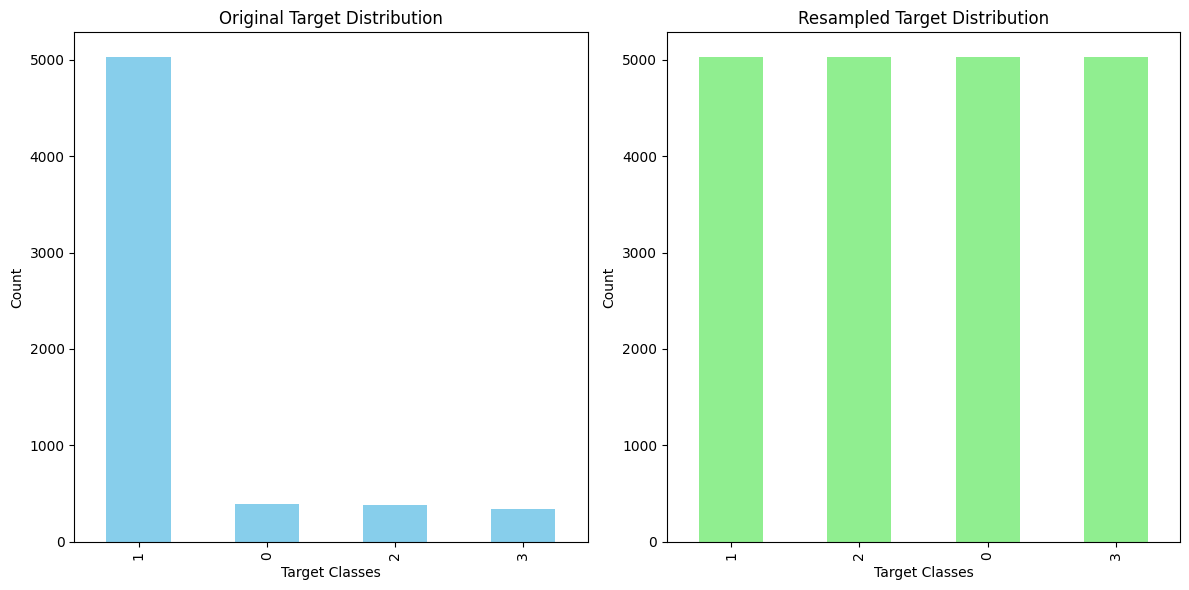

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the target before oversampling (on the original training data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title('Original Target Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Count')

# Plot the distribution of the target after oversampling (on the resampled training data)
plt.subplot(1, 2, 2)
y_train_res.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Resampled Target Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


---
Third DataFrame

In [ ]:
# here is the dataframe with the new geometery features
gdf_only = gdf[['area', 'perimeter', 'centroid_x', 'centroid_y']]
df_withGeo = pd.concat([gdf_only, modified_df], axis=1)

# **CatBoost**

In [ ]:
! pip install catboost

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         8775 non-null   object
 1   Crop             8775 non-null   object
 2   District         8775 non-null   object
 3   Sub-District     8775 non-null   object
 4   CropCoveredArea  8775 non-null   int64 
 5   CHeight          8775 non-null   int64 
 6   CNext            8775 non-null   object
 7   CLast            8775 non-null   object
 8   CTransp          8775 non-null   object
 9   IrriType         8775 non-null   object
 10  IrriSource       8775 non-null   object
 11  IrriCount        8775 non-null   int64 
 12  WaterCov         8775 non-null   int64 
 13  ExpYield         8775 non-null   int64 
 14  Season           8775 non-null   object
 15  time_to_harvest  8775 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.1+ MB


---
No encoding, without geometry, since CatBoost cannot process polygon objects.

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Assuming you have your DataFrame 'df' ready
# Label encode the target column 'category'
original_df['category_encoded'] = original_df['category'].astype('category').cat.codes

# Define your feature columns (excluding the target and any non-feature columns)
features = ['Crop', 'District', 'Sub-District', 'time_to_harvest' ,
            'CropCoveredArea', 'CHeight', 'CNext', 'CLast', 'CTransp',
            'IrriType', 'IrriSource', 'IrriCount', 'WaterCov', 'ExpYield',
            'Season']

# Split the data
X = original_df[features]
y = original_df['category_encoded']

# Convert categorical features to 'category' dtype (CatBoost expects this format)
categorical_features = ['Crop', 'District', 'Sub-District', 'CNext', 'CLast',
                        'CTransp', 'IrriType', 'IrriSource', 'Season']

X[categorical_features] = X[categorical_features].apply(lambda x: x.astype('category'))

# Split the dataset into training (70%), validation (15%), and test sets (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=7, cat_features=categorical_features, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Predict on the train, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate F1 scores for each dataset (train, validation, and test)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print F1 scores for train, validation, and test sets
print(f'F1 Score (Train): {f1_train:.4f}')
print(f'F1 Score (Validation): {f1_val:.4f}')
print(f'F1 Score (Test): {f1_test:.4f}')

<ipython-input-35-62043ec40275>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df['category_encoded'] = original_df['category'].astype('category').cat.codes
<ipython-input-35-62043ec40275>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].apply(lambda x: x.astype('category'))


0:	learn: 1.2266891	total: 124ms	remaining: 2m 3s
200:	learn: 0.5377778	total: 16.2s	remaining: 1m 4s
400:	learn: 0.4017971	total: 35.9s	remaining: 53.6s
600:	learn: 0.2987068	total: 54.9s	remaining: 36.5s
800:	learn: 0.2278243	total: 1m 14s	remaining: 18.5s
999:	learn: 0.1748400	total: 1m 34s	remaining: 0us
F1 Score (Train): 0.7450
F1 Score (Validation): 0.7458
F1 Score (Test): 0.7560


---
Oversampled data without geometry.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Select the specified columns
selected_columns = ['CropCoveredArea', 'CHeight', 'IrriCount', 'WaterCov',
                    'ExpYield', 'time_to_harvest', 'category_encoded',
                    'district_subdistrict_encoded', 'CNext_Maize', 'CNext_Mustard',
                    'CNext_Onion', 'CNext_Pea', 'CNext_Rice', 'CNext_Sorghum',
                    'CNext_Soybean', 'CNext_Tomato', 'CNext_Wheat', 'CLast_Maize',
                    'CLast_Mustard', 'CLast_Onion', 'CLast_Pea', 'CLast_Rice',
                    'CLast_Sorghum', 'CLast_Soybean', 'CLast_Tomato', 'CLast_Wheat',
                    'IrriType_Flood', 'IrriType_Sprinkler', 'IrriType_Surface',
                    'IrriSource_Groundwater', 'IrriSource_Rainfed', 'IrriSource_Tubewell',
                    'IrriSource_Well', 'Season_Rabi']

# Prepare features and target
X = modified_df[selected_columns].drop('category_encoded', axis=1)  # Features
y = modified_df['category_encoded']  # Target

# Split the data into train (70%), test (15%), and validation (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=7, verbose=200)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

# Evaluate the model using F1 score for train, test, and validation sets
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

# Print the F1 scores
print(f'F1 Score (Train): {f1_train:.4f}')
print(f'F1 Score (Test): {f1_test:.4f}')
print(f'F1 Score (Validation): {f1_val:.4f}')

0:	learn: 1.2278840	total: 8.01ms	remaining: 8s
200:	learn: 0.4877527	total: 1.55s	remaining: 6.17s
400:	learn: 0.3763427	total: 3.11s	remaining: 4.65s
600:	learn: 0.2980498	total: 4.71s	remaining: 3.13s
800:	learn: 0.2402458	total: 6.3s	remaining: 1.57s
999:	learn: 0.1955831	total: 7.88s	remaining: 0us
F1 Score (Train): 0.9444
F1 Score (Test): 0.7473
F1 Score (Validation): 0.7555


---
modified_df oversampled with geometry.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# Specify the columns to use for training
selected_columns = ['area', 'perimeter', 'centroid_x', 'centroid_y', 'CropCoveredArea',
                    'CHeight', 'IrriCount', 'WaterCov', 'ExpYield', 'time_to_harvest',
                    'category_encoded', 'district_subdistrict_encoded', 'CNext_Maize',
                    'CNext_Mustard', 'CNext_Onion', 'CNext_Pea', 'CNext_Rice',
                    'CNext_Sorghum', 'CNext_Soybean', 'CNext_Tomato', 'CNext_Wheat',
                    'CLast_Maize', 'CLast_Mustard', 'CLast_Onion', 'CLast_Pea',
                    'CLast_Rice', 'CLast_Sorghum', 'CLast_Soybean', 'CLast_Tomato',
                    'CLast_Wheat', 'IrriType_Flood', 'IrriType_Sprinkler',
                    'IrriType_Surface', 'IrriSource_Groundwater', 'IrriSource_Rainfed',
                    'IrriSource_Tubewell', 'IrriSource_Well', 'Season_Rabi']

# Prepare the feature matrix X and target variable y
X = df_withGeo[selected_columns].drop('category_encoded', axis=1)  # Drop target column from features
y = df_withGeo['category_encoded']  # Target column

# Split the dataset into training, test, and validation sets (70% train, 15% test, 15% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the CatBoost model
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=7, verbose=200)

# Train the model and collect metrics for the learning curve
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_set=eval_set, use_best_model=True, plot=True)

# Predict on the train, test, and validation sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

# Evaluate the model using F1 score for multi-class classification
f1_train = f1_score(y_train, y_train_pred, average='weighted')  # Weighted F1 for class imbalance
f1_test = f1_score(y_test, y_test_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

# Print F1 scores
print(f'F1 Score (Train): {f1_train:.4f}')
print(f'F1 Score (Test): {f1_test:.4f}')
print(f'F1 Score (Validation): {f1_val:.4f}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2324105	test: 1.2324105	test1: 1.2288948	best: 1.2288948 (0)	total: 14.1ms	remaining: 14.1s
200:	learn: 0.4851173	test: 0.4851173	test1: 0.6470282	best: 0.6351482 (42)	total: 2.48s	remaining: 9.85s
400:	learn: 0.3670143	test: 0.3670143	test1: 0.6679146	best: 0.6351482 (42)	total: 5.15s	remaining: 7.7s
600:	learn: 0.2791028	test: 0.2791028	test1: 0.6827367	best: 0.6351482 (42)	total: 7.69s	remaining: 5.1s
800:	learn: 0.2158059	test: 0.2158059	test1: 0.7014148	best: 0.6351482 (42)	total: 10.3s	remaining: 2.55s
999:	learn: 0.1732382	test: 0.1732382	test1: 0.7205905	best: 0.6351482 (42)	total: 13.1s	remaining: 0us

bestTest = 0.6351481618
bestIteration = 42

Shrink model to first 43 iterations.
F1 Score (Train): 0.7379
F1 Score (Test): 0.7462
F1 Score (Validation): 0.7560


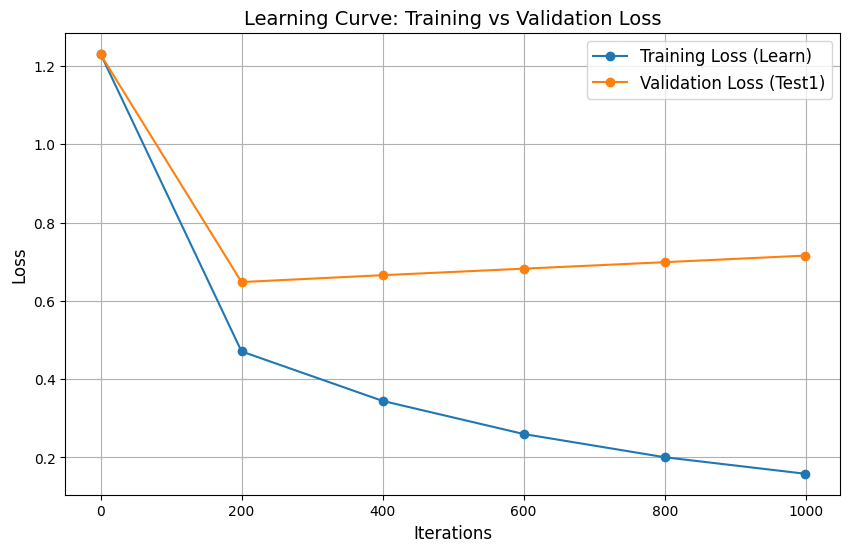

In [ ]:
import matplotlib.pyplot as plt

# Data from the provided log
iterations = [0, 200, 400, 600, 800, 999]
learn_loss = [1.2313466, 0.4708167, 0.3444904, 0.2598870, 0.2005567, 0.1584516]
test1_loss = [1.2296272, 0.6480610, 0.6656021, 0.6822445, 0.6988197, 0.7156524]

# Plot the learning loss and test1 loss
plt.figure(figsize=(10, 6))
plt.plot(iterations, learn_loss, label='Training Loss (Learn)', marker='o')
plt.plot(iterations, test1_loss, label='Validation Loss (Test1)', marker='o')

# Adding titles and labels
plt.title('Learning Curve: Training vs Validation Loss', fontsize=14)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

# **XGBoost**
---
##### Using df_withGeo DataFrame.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint

# XGBoost for model training
import xgboost as xgb

# Set random seeds for reproducibility
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
print("Selected DataFrame: df_withGeo\n", df_withGeo.head())

Selected DataFrame: df_withGeo
            area  perimeter  centroid_x  centroid_y  CropCoveredArea  CHeight  \
0  3.982611e-08   0.000849   78.181592   17.978863               97       54   
1  5.989901e-08   0.001016   78.175606   17.980966               82       58   
2  3.867260e-08   0.000798   78.169207   17.976084               92       91   
3  4.745308e-08   0.000913   78.169059   17.974588               91       52   
4  2.324137e-08   0.000609   78.172695   17.969159               94       55   

   IrriCount  WaterCov  ExpYield  time_to_harvest  ...  CLast_Tomato  \
0          4        87        17              141  ...         False   
1          5        94        15              165  ...         False   
2          3        99        20              131  ...         False   
3          5        92        16              632  ...         False   
4          5        97        20              159  ...         False   

   CLast_Wheat  IrriType_Flood  IrriType_Sprinkler  Ir

In [ ]:
# Define feature columns and target
feature_columns = [
    'CropCoveredArea', 'CHeight', 'IrriCount', 'WaterCov',
    'ExpYield', 'time_to_harvest', 'district_subdistrict_encoded',
    'CNext_Maize', 'CNext_Mustard', 'CNext_Onion', 'CNext_Pea',
    'CNext_Rice', 'CNext_Sorghum', 'CNext_Soybean', 'CNext_Tomato',
    'CNext_Wheat', 'CLast_Maize', 'CLast_Mustard', 'CLast_Onion',
    'CLast_Pea', 'CLast_Rice', 'CLast_Sorghum', 'CLast_Soybean',
    'CLast_Tomato', 'CLast_Wheat', 'IrriType_Flood', 'IrriType_Sprinkler',
    'IrriType_Surface', 'IrriSource_Groundwater', 'IrriSource_Rainfed',
    'IrriSource_Tubewell', 'IrriSource_Well', 'Season_Rabi',
    'area', 'perimeter', 'centroid_x', 'centroid_y'
]

# Features and target
X = df_withGeo[feature_columns]
y = df_withGeo['category_encoded']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (8775, 37)
Target shape: (8775,)


In [ ]:
# Split into train (70%) and temp (30%) then split temp into validation (15%) and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=SEED, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 6142
Validation set size: 1316
Test set size: 1317


In [ ]:
# Here start to (Handling Class Imbalance with SMOTE)
# Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


from collections import Counter

print(f"Original training set class distribution: ",  Counter(y_train))
print(f"Resampled training set class distribution: ", Counter(y_train_res))

Original training set class distribution:  Counter({1: 5049, 0: 376, 2: 375, 3: 342})
Resampled training set class distribution:  Counter({1: 5049, 2: 5049, 0: 5049, 3: 5049})


In [ ]:
#XGBoost classifier with a fixed seed for reproducibility

xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,       # The four categories: Healthy, Diseased, Pests, Stressed
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Hyperparameter Tuning with RandomizedSearchCV
# Define the hyperparameter grid

param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid, n_iter=100,
        scoring='f1_weighted', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV

random_search.fit(X_train_res, y_train_res)
print("Best Hyperparameters: \n", random_search.best_params_)

# Best estimator from RandomizedSearchCV
best_xgb = random_search.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: 
 {'colsample_bytree': 0.9586978065427658, 'gamma': 0.026500031988027084, 'learning_rate': 0.3025201488835427, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 673, 'reg_alpha': 0.9293759891275858, 'reg_lambda': 0.5567628930139298, 'subsample': 0.7858063447349499}


In [ ]:
# Predict on the train, test, and validation sets
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)
y_val_pred = best_xgb.predict(X_val)

# Calculate Accuracy and F1 Score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # Weighted F1 for class imbalance
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"\nTrain Accuracy: {train_accuracy:.4f}\n")
print(f"Train Weighted F1 Score: {train_f1:.4f}\n")

print(f"Test Accuracy: {test_accuracy:.4f}\n")
print(f"Test Weighted F1 Score: {test_f1:.4f}\n")

print(f"Validation Accuracy: {val_accuracy:.4f}\n")
print(f"Validation Weighted F1 Score: {val_f1:.4f}")


Train Accuracy: 1.0000

Train Weighted F1 Score: 1.0000

Test Accuracy: 0.7707

Test Weighted F1 Score: 0.7292

Validation Accuracy: 0.7781

Validation Weighted F1 Score: 0.7342


In [ ]:
print("Classification Report on Training Set: \n", classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))
print("Classification Report on Test Set: \n", classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))
print("Classification Report on Validation Set: ",classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

Classification Report on Training Set: 
               precision    recall  f1-score   support

    Diseased       1.00      1.00      1.00       376
     Healthy       1.00      1.00      1.00      5049
       Pests       1.00      1.00      1.00       375
    Stressed       1.00      1.00      1.00       342

    accuracy                           1.00      6142
   macro avg       1.00      1.00      1.00      6142
weighted avg       1.00      1.00      1.00      6142

Classification Report on Test Set: 
               precision    recall  f1-score   support

    Diseased       0.16      0.07      0.10        81
     Healthy       0.83      0.93      0.87      1083
       Pests       0.06      0.03      0.04        80
    Stressed       0.07      0.03      0.04        73

    accuracy                           0.77      1317
   macro avg       0.28      0.26      0.26      1317
weighted avg       0.70      0.77      0.73      1317

Classification Report on Validation Set:            

---
#### SECOND TRY:
- From the high accuracy and F1 scores on the training set (1.0000), which may lead to overfitting. while the testing and validation accuracies and f1 scores are good (around 0.77-0.78), which may show that the model has learned the training data very well, but may not generalize optimally.
- So now we will try to change using smaller hyperparameters ranges, early stop to stop training once validation performance not improved so no computation time will be wasted. Reducing the liklihood of overfitting.

In [ ]:
from joblib import parallel_backend

In [ ]:

# Define the XGBoost model with early stopping
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Hyperparameter grid
param_dist = {
    'learning_rate': uniform(0.01, 0.1),   #instead of(0.01-0.3)
    'n_estimators': randint(100, 500),     #instead of (100-1000)
    'subsample': uniform(0.7, 0.3),        #tight sampling range (0.7-1) instead of (0.5-1)
    'colsample_bytree': uniform(0.7, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 5),     #instead of (1-10)
    'gamma': uniform(0, 0.5),              #smaller upper bound instead of (0,5)
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# RandomizedSearchCV for hyperparameter tuning
# using fewer iterations (n_iter=100 instead of n_iter=50)
# reduce computational resources  (n_jobs=4 instead of n_jobs= -1)

random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=50,
    scoring='f1_weighted', cv=3, verbose=1,random_state=42, n_jobs=4)

# Fit the RandomizedSearchCV
random_search.fit(X_train_res, y_train_res)

print("Best Hyperparameters: \n", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: 
 {'colsample_bytree': 0.8619523273905019, 'gamma': 0.1015306123673847, 'learning_rate': 0.1042853570557981, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 342, 'reg_alpha': 0.16122128725400442, 'reg_lambda': 0.9296976523425731, 'subsample': 0.942436113869325}


In [ ]:
# Best model from RandomizedSearchCV
best_xgb = random_search.best_estimator_

# Train the model with early stopping
best_xgb.fit(X_train_res, y_train_res, eval_set=[(X_train_res, y_train_res), (X_val, y_val)],
             early_stopping_rounds=50, verbose=True)

[0]	validation_0-mlogloss:1.32351	validation_1-mlogloss:1.34440
[1]	validation_0-mlogloss:1.26424	validation_1-mlogloss:1.30653


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-mlogloss:1.21235	validation_1-mlogloss:1.26817
[3]	validation_0-mlogloss:1.17050	validation_1-mlogloss:1.24236
[4]	validation_0-mlogloss:1.12566	validation_1-mlogloss:1.21730
[5]	validation_0-mlogloss:1.09034	validation_1-mlogloss:1.19606
[6]	validation_0-mlogloss:1.04703	validation_1-mlogloss:1.17305
[7]	validation_0-mlogloss:1.01558	validation_1-mlogloss:1.15143
[8]	validation_0-mlogloss:0.97744	validation_1-mlogloss:1.12794
[9]	validation_0-mlogloss:0.95229	validation_1-mlogloss:1.11100
[10]	validation_0-mlogloss:0.92007	validation_1-mlogloss:1.09554
[11]	validation_0-mlogloss:0.89257	validation_1-mlogloss:1.08085
[12]	validation_0-mlogloss:0.86605	validation_1-mlogloss:1.06786
[13]	validation_0-mlogloss:0.84102	validation_1-mlogloss:1.05176
[14]	validation_0-mlogloss:0.81531	validation_1-mlogloss:1.03662
[15]	validation_0-mlogloss:0.79219	validation_1-mlogloss:1.02322
[16]	validation_0-mlogloss:0.77299	validation_1-mlogloss:1.01280
[17]	validation_0-mlogloss:0.7528

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8619523273905019, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.1015306123673847, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1042853570557981,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=342, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred = best_xgb.predict(X_train)
y_val_pred = best_xgb.predict(X_val)
y_test_pred = best_xgb.predict(X_test)

# Calculate Accuracy and F1 Score
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nTrain Accuracy: {train_accuracy:.4f}\n")
print(f"Train Weighted F1 Score: {train_f1:.4f}\n")

print(f"Validation Accuracy: {val_accuracy:.4f}\n")
print(f"Validation Weighted F1 Score: {val_f1:.4f}\n")

print(f"Test Accuracy: {test_accuracy:.4f}\n")
print(f"Test Weighted F1 Score: {test_f1:.4f}")


Train Accuracy: 0.9510

Train Weighted F1 Score: 0.9504

Validation Accuracy: 0.7553

Validation Weighted F1 Score: 0.7259

Test Accuracy: 0.7487

Test Weighted F1 Score: 0.7162


---
- From the prediction and evaluation results we can see that training metrics lower than the first try seems more realistic which reduced overfitting.
- By addressing overfitting and improving generalization, the second model delivers a more robust and reliable performance on unseen data.

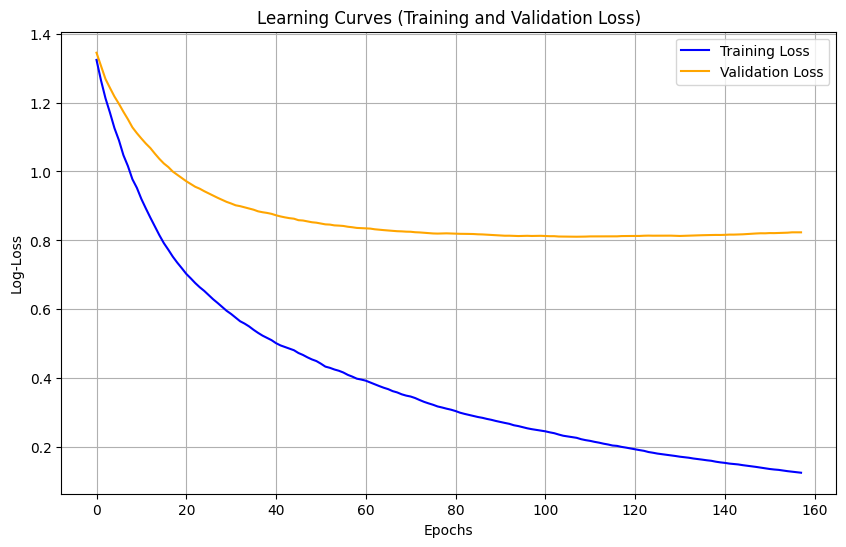

In [ ]:
# Plotting the learning curves (training and validation losses)
epochs = len(best_xgb.evals_result()['validation_0']['mlogloss'])
plt.figure(figsize=(10, 6))

# Training and validation loss Plot
plt.plot(range(epochs), best_xgb.evals_result()['validation_0']['mlogloss'], label='Training Loss', color='blue')
plt.plot(range(epochs), best_xgb.evals_result()['validation_1']['mlogloss'], label='Validation Loss', color='orange')

plt.title('Learning Curves (Training and Validation Loss)')
plt.xlabel('Epochs')
plt.ylabel('Log-Loss')
plt.legend()
plt.grid(True)
plt.show()

---
#### THIRD TRY

Here in this model we try to include comprehansive preprocessing (imputation, scaling, resampling) ensuring clean and consistent input for the model.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y = df_withGeo['category_encoded']
counter = Counter(y)
print("Original class distribution:")
for k, v in counter.items():
    print(f"Class {k}: {v}")

Original class distribution:
Class 1: 7214
Class 0: 537
Class 2: 536
Class 3: 488


In [ ]:
# Identify and Handle missing values if any

all_nan_cols = X_train.columns[X_train.isna().all()].tolist()
print("Columns with all NaN:", all_nan_cols)

# Fill columns with all NaN with 0 in training, validation, and test sets
for col in all_nan_cols:
    X_train[col].fillna(0, inplace=True)
    X_val[col].fillna(0, inplace=True)
    X_test[col].fillna(0, inplace=True)

Columns with all NaN: []


In [ ]:
# Imputation of numerical data with mean strategy

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform
X_train_imputed = imputer.fit_transform(X_train)

# Transform the validation and test data
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Convert back to DataFrame for better readability
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X.columns, index=X_train.index)
X_val_imputed = pd.DataFrame(X_val_imputed, columns=X.columns, index=X_val.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X.columns, index=X_test.index)

In [ ]:
# Add missing columns with default value 0
def add_missing_columns(df, original_columns):
    missing_cols = set(original_columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    # Reorder columns to match original
    df = df[original_columns]
    return df

# Apply the function to training, validation, and test sets
X_train_imputed = add_missing_columns(X_train_imputed, X.columns)
X_val_imputed = add_missing_columns(X_val_imputed, X.columns)
X_test_imputed = add_missing_columns(X_test_imputed, X.columns)

# Verify that there are no missing columns
print(f"Training set columns after imputation: {X_train_imputed.shape[1]}")
print(f"Original number of columns: {len(X.columns)}")
print(f"Validation set columns after imputation: {X_val_imputed.shape[1]}")
print(f"Test set columns after imputation: {X_test_imputed.shape[1]}")

Training set columns after imputation: 37
Original number of columns: 37
Validation set columns after imputation: 37
Test set columns after imputation: 37


In [ ]:
# Resampling for class imbalance

print("Original training set class distribution:", Counter(y_train))

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

print("Resampled training set class distribution:", Counter(y_train_res))

Original training set class distribution: Counter({1: 5049, 0: 376, 2: 375, 3: 342})
Resampled training set class distribution: Counter({1: 5049, 2: 5049, 0: 5049, 3: 5049})


In [ ]:
# Feature scaling

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
from scipy.stats import uniform, randint

xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)


param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
print("Starting Hyperparameter Tuning...")
random_search.fit(X_train_res_scaled, y_train_res)

print("Best Hyperparameters Found:")
print(random_search.best_params_)

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters Found:
{'colsample_bytree': 0.5852620618436457, 'gamma': 0.3252579649263976, 'learning_rate': 0.29466566117599996, 'max_depth': 14, 'min_child_weight': 2, 'n_estimators': 876, 'reg_alpha': 0.015966252220214194, 'reg_lambda': 0.230893825622149, 'subsample': 0.6205127330130058}


In [ ]:
# Model training with early stopping

best_xgb = random_search.best_estimator_

# Fit the model
print("Training Final Model with Early Stopping")
best_xgb.fit(
    X_train_res_scaled, y_train_res,
    eval_set=[(X_val_scaled, y_val)],
    early_stopping_rounds=50,
    verbose=True
)

Training Final Model with Early Stopping
[0]	validation_0-mlogloss:1.17293
[1]	validation_0-mlogloss:1.05748
[2]	validation_0-mlogloss:0.96429
[3]	validation_0-mlogloss:0.89912
[4]	validation_0-mlogloss:0.84988
[5]	validation_0-mlogloss:0.81452
[6]	validation_0-mlogloss:0.78548
[7]	validation_0-mlogloss:0.76520
[8]	validation_0-mlogloss:0.74865
[9]	validation_0-mlogloss:0.73541
[10]	validation_0-mlogloss:0.72798
[11]	validation_0-mlogloss:0.72641
[12]	validation_0-mlogloss:0.72518
[13]	validation_0-mlogloss:0.72554
[14]	validation_0-mlogloss:0.72520
[15]	validation_0-mlogloss:0.72931
[16]	validation_0-mlogloss:0.72994
[17]	validation_0-mlogloss:0.73236
[18]	validation_0-mlogloss:0.73431
[19]	validation_0-mlogloss:0.73716
[20]	validation_0-mlogloss:0.74070
[21]	validation_0-mlogloss:0.74393
[22]	validation_0-mlogloss:0.74649
[23]	validation_0-mlogloss:0.74727
[24]	validation_0-mlogloss:0.75038
[25]	validation_0-mlogloss:0.75289
[26]	validation_0-mlogloss:0.75692
[27]	validation_0-mloglo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5852620618436457, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.3252579649263976, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.29466566117599996,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=876, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [ ]:
# Predict on the training set
y_train_pred = best_xgb.predict(X_train_res_scaled)
train_accuracy = accuracy_score(y_train_res, y_train_pred)
train_f1 = f1_score(y_train_res, y_train_pred, average='weighted')

# Predict on the test set
y_test_pred = best_xgb.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Predict on the validation set
y_val_pred = best_xgb.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print results for train, validation, and test
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Training Weighted F1 Score: {train_f1:.4f}\n")

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Weighted F1 Score: {val_f1:.4f}\n")

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Weighted F1 Score: {test_f1:.4f}\n")

# Print classification reports
print("\nClassification Report on Training Set:")
print(classification_report(y_train_res, y_train_pred, target_names=label_encoder.classes_))

print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Training Accuracy: 0.9820
Training Weighted F1 Score: 0.9821

Validation Accuracy: 0.8062
Validation Weighted F1 Score: 0.7409

Test Accuracy: 0.7957
Test Weighted F1 Score: 0.7332


Classification Report on Training Set:
              precision    recall  f1-score   support

    Diseased       0.99      0.98      0.99      5049
     Healthy       0.94      0.99      0.97      5049
       Pests       1.00      0.97      0.99      5049
    Stressed       1.00      0.98      0.99      5049

    accuracy                           0.98     20196
   macro avg       0.98      0.98      0.98     20196
weighted avg       0.98      0.98      0.98     20196


Classification Report on Validation Set:
              precision    recall  f1-score   support

    Diseased       0.21      0.07      0.11        80
     Healthy       0.82      0.98      0.89      1082
       Pests       0.00      0.00      0.00        81
    Stressed       0.00      0.00      0.00        73

    accuracy                

---
The results shows that this model is more robust and better prepared for handling noisy or any imbalance in the dataset, lead the model to generalizes better.

In [ ]:
# Print confusion matrices
print("Confusion Matrix on Training Set:")
print(confusion_matrix(y_train_res, y_train_pred))

print("Confusion Matrix on Validation Set:")
print(confusion_matrix(y_val, y_val_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix on Training Set:
[[4965   78    3    3]
 [  41 5007    0    1]
 [   4  119 4921    5]
 [   9   99    2 4939]]
Confusion Matrix on Validation Set:
[[   6   74    0    0]
 [  22 1055    4    1]
 [   1   80    0    0]
 [   0   72    1    0]]
Confusion Matrix on Test Set:
[[   4   76    0    1]
 [  33 1044    4    2]
 [   0   80    0    0]
 [   1   72    0    0]]


------
# **Model four (fourth try) is the Best choice**
#### After completing all the attempts at improvement and experimentation, we can say that the fourth model is the best.
##### Because of:
##### - Better Generalization: Performs consistently across training, validation, and test datasets.
##### - Higher Validation/Test Metrics: Achieves better real-world applicability with higher F1 scores and accuracy on unseen data.
##### - Robustness: Less prone to overfitting, making it more reliable for deployment.

---
#### FOURTH TRY:

Despite the third model gave excellent results, we want to avoid overfitting as much as possible.

- using the same method of the third model making further changes trying to get better performance that prevented overfitting and generalize better.

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',   #uses (multi:softmax instead of multi:softprob)
# this output the predicted class direclty rather than probabilities
    eval_metric='mlogloss',
    use_label_encoder=False,
    seed=42
)

# using discrete values rather than distribustions for hayperparameters
# help to reduces randomness in hyperparameter selection.

param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

# RandomizedSearchCV for faster hyperparameter search

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=55,
                scoring='f1_weighted', n_jobs=-1, cv=3, verbose=2, random_state=42)

print("Starting Randomized Search for Hyperparameter Tuning...")
random_search.fit(X_train, y_train)
print("Best Hyperparameters found:")
print(random_search.best_params_)

Starting Randomized Search for Hyperparameter Tuning...
Fitting 3 folds for each of 55 candidates, totalling 165 fits
Best Hyperparameters found:
{'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [ ]:
best_xgb = random_search.best_estimator_

# Early Stopping to Prevent Overfitting
best_xgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=50,
)

[0]	validation_0-mlogloss:1.27417
[1]	validation_0-mlogloss:1.18256
[2]	validation_0-mlogloss:1.10709
[3]	validation_0-mlogloss:1.04430
[4]	validation_0-mlogloss:0.99133
[5]	validation_0-mlogloss:0.94470
[6]	validation_0-mlogloss:0.90586
[7]	validation_0-mlogloss:0.87178
[8]	validation_0-mlogloss:0.84236
[9]	validation_0-mlogloss:0.81668
[10]	validation_0-mlogloss:0.79485
[11]	validation_0-mlogloss:0.77559
[12]	validation_0-mlogloss:0.75960
[13]	validation_0-mlogloss:0.74571
[14]	validation_0-mlogloss:0.73364
[15]	validation_0-mlogloss:0.72270
[16]	validation_0-mlogloss:0.71357
[17]	validation_0-mlogloss:0.70469
[18]	validation_0-mlogloss:0.69790
[19]	validation_0-mlogloss:0.69305
[20]	validation_0-mlogloss:0.68797
[21]	validation_0-mlogloss:0.68371
[22]	validation_0-mlogloss:0.67970
[23]	validation_0-mlogloss:0.67634
[24]	validation_0-mlogloss:0.67413
[25]	validation_0-mlogloss:0.67190
[26]	validation_0-mlogloss:0.66966
[27]	validation_0-mlogloss:0.66719
[28]	validation_0-mlogloss:0.6

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_train_pred = best_xgb.predict(X_train)
y_val_pred = best_xgb.predict(X_val)
y_test_pred = best_xgb.predict(X_test)

f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

acc_train = accuracy_score(y_train, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("\n Performance Metrics")
print(f"Train F1 (weighted): {f1_train:.4f}, Accuracy: {acc_train:.4f}")
print(f"Validation F1 (weighted): {f1_val:.4f}, Accuracy: {acc_val:.4f}")
print(f"Test F1 (weighted): {f1_test:.4f}, Accuracy: {acc_test:.4f}")


 Performance Metrics
Train F1 (weighted): 0.7433, Accuracy: 0.8227
Validation F1 (weighted): 0.7420, Accuracy: 0.8222
Test F1 (weighted): 0.7421, Accuracy: 0.8223


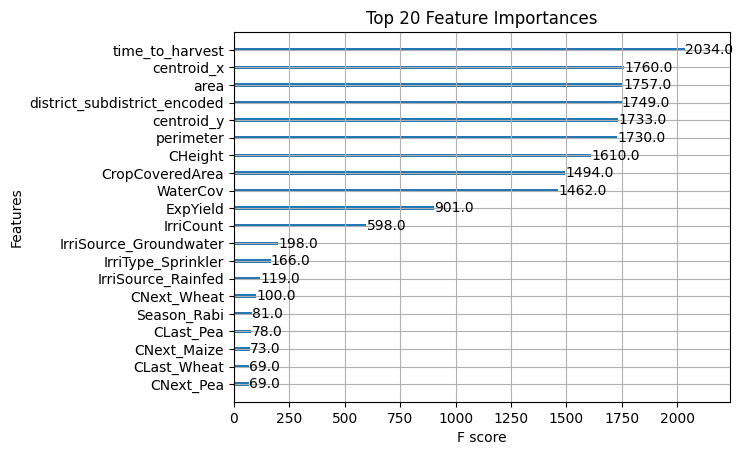

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb, max_num_features=20, title="Top 20 Feature Importances")
plt.show()

Here tyring different DataFrame to see if the performance will change or not.
---

---
## XGBoost on modified_df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier

In [ ]:
X = modified_df.drop('category_encoded', axis=1)  # Features
y = modified_df['category_encoded']  # Target

In [ ]:
# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Using RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Training the model with the best parameters
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [ ]:
# Evaluate on training set
y_train_pred = best_xgb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("\nTraining Accuracy: ", train_accuracy)
print("Training F1 Score: ", train_f1)

# Evaluate on validation set
y_val_pred = best_xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("\nValidation Accuracy: ", val_accuracy)
print("Validation F1 Score: ", val_f1)

# Final evaluation on test set
y_test_pred = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1)


Training Accuracy:  0.8285574731357864
Training F1 Score:  0.7592565472643514

Validation Accuracy:  0.8252279635258358
Validation F1 Score:  0.7462094657694069

Test Accuracy:  0.8321943811693242
Test F1 Score:  0.7559759981446991


---
## RandomForest on modified_df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
X = modified_df.drop('category_encoded', axis=1)  # Features
y = modified_df['category_encoded']  # Target

In [ ]:
# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Training the model with the best parameters
best_rf = grid_search.best_estimator_

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Evaluate on training set
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("\nTraining Accuracy: ", train_accuracy)
print("Training F1 Score: ", train_f1)

# Evaluate on validation set
y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("\nValidation Accuracy: ", val_accuracy)
print("Validation F1 Score: ", val_f1)

# Final evaluation on test set
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTest Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1)


Training Accuracy:  0.8207424291761641
Training F1 Score:  0.7413752175920846

Validation Accuracy:  0.8252279635258358
Validation F1 Score:  0.7462094657694069

Test Accuracy:  0.8321943811693242
Test F1 Score:  0.7559759981446991
